In [1]:
#%pip install --upgrade xarray numpy matplotlib pandas seaborn pingouin

In [1]:
# import external packages
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg

# Add path with self-created packages and import them
import sys
sys.path.append('./src')
import sciebo

# Pupil Position Analysis with Pandas and Pingouin

In the experiment reported by [Steinmetz et al, 2019 in Nature](https://www.nature.com/articles/s41586-019-1787-x), mcie perform a discrimination task where move the position of a stimulus using a steering wheel. During the experiment, a camera records the pupil position of the subject in the x and y directions.


##### Analysis Goals
In this notebook we will be analyzing the pupil position with statistical tests.

##### Learning Goals


We will explore the [**pingouin**](https://pingouin-stats.org/build/html/index.html) Python package to perform statistical tests like correlation analysis and t-tests. This will be complemented by visualisations with the [**Seaborn**](https://seaborn.pydata.org/) plotting package.


---

## Warm up TBD 
* dropping columns from dataframe? 
* 

Let's start by downloading our data, which is stored as a .csv file 

In [4]:
sciebo.download_from_sciebo('https://uni-bonn.sciebo.de/UPDATELINK', 'data/pupil.csv')

Now load the file into a pandas DataFrame using the `read_csv()` method

In [21]:
df = pd.read_csv('data/pupil.csv')

df.head()

,Unnamed: 0,trial,mouse,session_date,time,pupil_x,pupil_y,contrast_left,contrast_right,wheel
0,0,1,Muller,2017-01-08,0.01,2.635524,-0.753684,50.0,0.0,1.0
1,1,1,Muller,2017-01-08,0.02,2.622296,-0.774388,50.0,0.0,0.0
2,2,1,Muller,2017-01-08,0.03,2.621289,-0.748939,50.0,0.0,0.0
3,3,1,Muller,2017-01-08,0.04,2.657471,-0.766579,50.0,0.0,1.0
4,4,1,Muller,2017-01-08,0.05,2.617581,-0.723780,50.0,0.0,0.0


---

## Draw a best fitting line : Regression plots

Complex data can be characterised by simple underlying relations. For example we may expect that when the mouse is turning the wheel to the left, the eye also tracks to the left. This would explain the behaviour of both wheel speed and pupil position.

Let's assess whether the wheel speed and pupil position are related through regression plots. 

A regression plot shows two sets of datapoints as well as the best fitting line that describes their relationship to one another.

**Useful Code**


- **Pandas**
    - `pd.read_csv('my_file.csv')`: load `my_file.csv` into a pandas DataFrame
    - `df[df['colunm_name]== 6]`: select rows of the dataframe where `column_name` is 6 
   
- **Seaborn**
    - `sns.regplot(data=df, x='column1', y='column2')`: make a regression plot with columns `column1` and `column2` from dataframe `df`

Let's start by downloading our data, which is stored as .csv file.

In [ ]:
sciebo.download_from_sciebo('https://uni-bonn.sciebo.de/UPDATELINK', 'data/pupil.csv')

Now load the file into a pandas DataFrame using the `read_csv()` method

In [90]:
df = pd.read_csv('data/pupil.csv')

**Exercises**

**Example**

Display the data for the trial number 11

In [ ]:
df[df['trial']==11]

Select the data for trial 37 and name the resulting dataframe `df_37`

In [39]:
df_37 = df[df['trial']==37]

Make a regression plot of pupil position for trial 37

<Axes: xlabel='pupil_x', ylabel='wheel'>

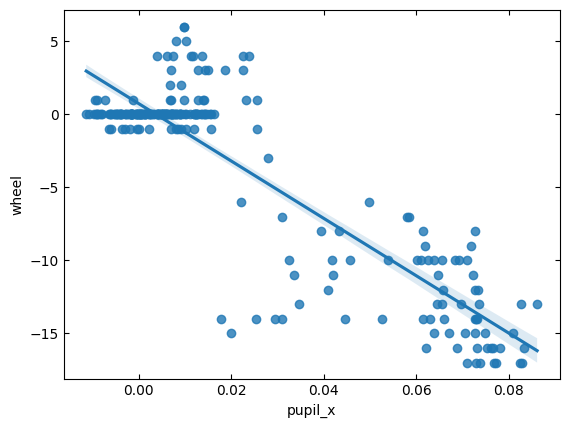

In [40]:
sns.regplot(data=df_37, x='pupil_x', y='wheel')

The confidence interval is plotted as a shaded region around the regression line. By default the confidence interval is 95%. This means that with 95% certainty, the regression line lies within the shaded region. 

Let's remake the plot with a higher confidence interval of 99.9% (we want to be really certain!). **Hint** - use the `ci` option

<Axes: xlabel='pupil_x', ylabel='wheel'>

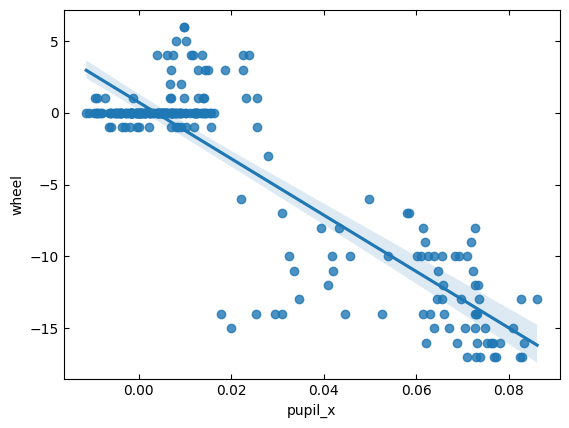

In [47]:
sns.regplot(data=df_37, x='pupil_x', y='wheel', ci=99.9)

What difference do you notice with a higher confidence interval?

Now let's make the same regression plot for trial 1. Do you think there is a correlation between wheel speed and pupil position?

<Axes: xlabel='pupil_x', ylabel='wheel'>

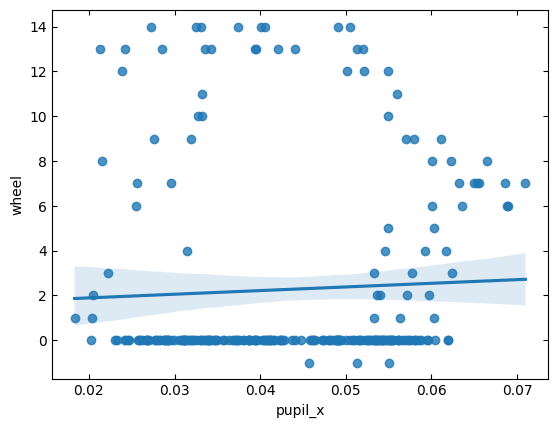

In [65]:
sns.regplot(data=df[df['trial']==11], x='pupil_x', y='wheel', ci=95)

What other data might be correlated in `df`? Make a plot and explore your idea.

<Axes: xlabel='pupil_x', ylabel='pupil_y'>

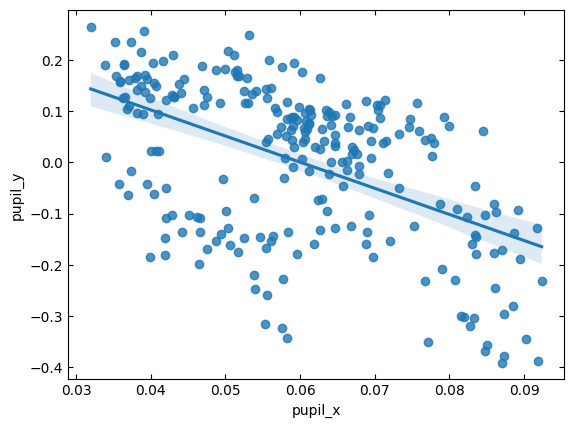

In [69]:
sns.regplot(data=df[df['trial']==13], x='pupil_x', y='pupil_y', ci=95)

## Scatter plots and Correlation

We are going to visualise the eye movement during a single trial with a scatter plot and test whether the x and y pupil positions are correlated.


**Useful Code**


- **Pandas**
    - `pd.read_csv('my_file.csv')`: load `my_file.csv` into a pandas DataFrame
    - `df[df['colunm_name]== 6]`: select rows of the dataframe where `column_name` is 6 
   
- **Seaborn**
    - `sns.scatterplot(data=df, x='column1', y='column2')`: make a scatterplot with columns `column1` and `column2` from dataframe `df`

- **pingouin**
  - `pg.corr(x_data, y_data)` : calculate the correlation between two variables `x_data` and `y_data`



**Exercises**

Find the data for the trial number 50 and set this as `df_50`

In [22]:
df_50 = df[df['trial']==50]

Make a scatterplot of the pupil position in the x and y directions during trial 50

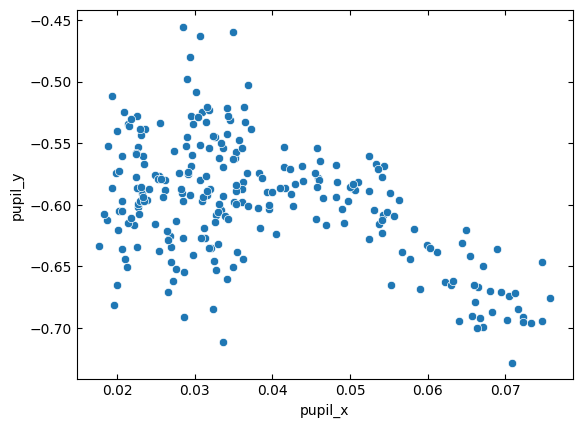

In [13]:
sns_plot = sns.scatterplot(data=df_50, x='pupil_x', y='pupil_y')

Recreate the above scatterplot but where each point is colored according to the time in the trial. **Hint** - use the `hue` argument

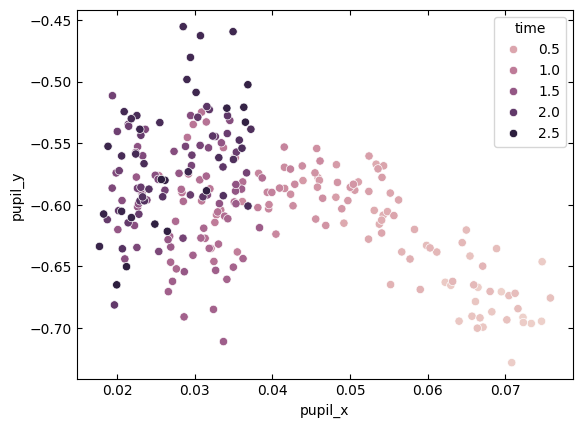

In [14]:
sns_plot = sns.scatterplot(data=df_50, x='pupil_x', y='pupil_y', hue='time')

The colorscale used can be changed with the `palette` parameter. 

Options can be found at https://matplotlib.org/stable/gallery/color/colormap_reference.html. 

Chose your favourite and remake the plot with it.

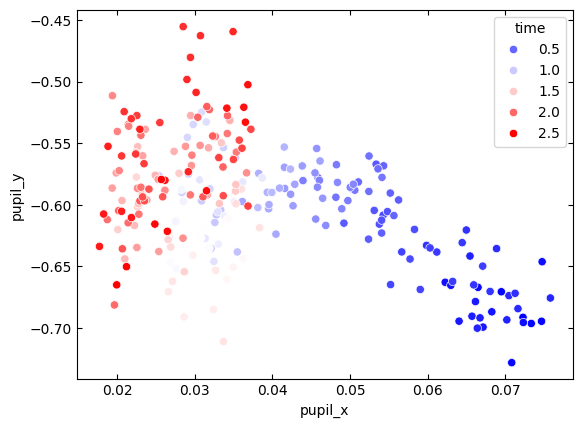

In [77]:
sns_plot = sns.scatterplot(data=df_50, x='pupil_x', y='pupil_y', hue='time',palette="bwr")

Let's now check whether the pupil x position is correlated with the pupil y position. 

Use the `pg.corr()` function to test for correlation.

In [15]:
pg.corr(df_50['pupil_x'], df_50['pupil_y'])

,n,r,CI95%,p-val,BF10,power
pearson,250,-0.493619,"[-0.58, -0.39]",9.259353e-17,6.582e+13,1.0


The `r` value tells us how correlated the data is. An `r` of -1 means perfect negative correlation, and an `r` of 1 perfect positive correlation. An `r` of 0 suggest no correlation at all. 

The `p-val` is the probability that the data looks like it does if there is no correlation. A very small `p-val` suggests that we can reject the hypothesis that the data are uncorrelated. 

Do you think that the data is correlated?


There are several methods of calculating correlation, by default `pengouin` determineds the Pearson-R coefficient, however there are other options. 

The biweight midcorrelation method is less sensitive to outliers as it is median-based (the Pearson method is mean-based), and so can be a better choice for data with many outliers. Biweight midcorrelation is called 'bicor' in `pengouin`.

Recalculate the correlation but instead using the `method` of 'bicor'. Do the two methods agree?



In [4]:
pg.corr(df_50['pupil_x'], df_50['pupil_y'], method='bicor')

,n,r,CI95%,p-val,power
bicor,250,-0.432976,"[-0.53, -0.33]",7.599209e-13,1.0


Let's calculate the correlations of pupil positions for all trials

In [96]:
df.head()

,trial,mouse,session_date,time,pupil_x,pupil_y,contrast_left,contrast_right,wheel,response_type
0,1,Muller,2017-01-08,0.01,2.635524,-0.753684,50.0,0.0,1.0,1.0
1,1,Muller,2017-01-08,0.02,2.622296,-0.774388,50.0,0.0,0.0,1.0
2,1,Muller,2017-01-08,0.03,2.621289,-0.748939,50.0,0.0,0.0,1.0
3,1,Muller,2017-01-08,0.04,2.657471,-0.766579,50.0,0.0,1.0,1.0
4,1,Muller,2017-01-08,0.05,2.617581,-0.723780,50.0,0.0,0.0,1.0


In [106]:
df[['trial', 'pupil_x', 'pupil_y']].groupby('trial').corr()#.drop('pupil_x')

pupil_x   pupil_y
trial                            
1     pupil_x  1.000000 -0.769625
      pupil_y -0.769625  1.000000
2     pupil_x  1.000000 -0.057721
      pupil_y -0.057721  1.000000
3     pupil_x  1.000000 -0.225245
...                 ...       ...
149   pupil_y -0.306127  1.000000
150   pupil_x  1.000000  0.196739
      pupil_y  0.196739  1.000000
151   pupil_x  1.000000  0.240495
      pupil_y  0.240495  1.000000

[302 rows x 2 columns]

<Axes: xlabel='pupil_x', ylabel='Count'>

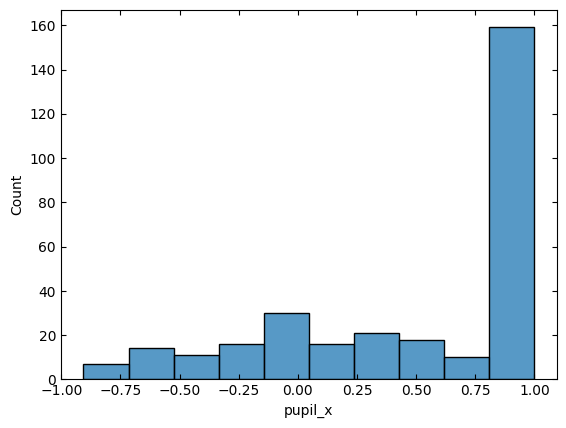

In [85]:
sns.histplot(df[['trial', 'pupil_x', 'pupil_y']].groupby('trial').corr()['pupil_x'])

In [86]:
df[['trial', 'pupil_x', 'pupil_y']].groupby('trial').corr()

pupil_x   pupil_y
trial                            
1     pupil_x  1.000000 -0.769625
      pupil_y -0.769625  1.000000
2     pupil_x  1.000000 -0.057721
      pupil_y -0.057721  1.000000
3     pupil_x  1.000000 -0.225245
...                 ...       ...
149   pupil_y -0.306127  1.000000
150   pupil_x  1.000000  0.196739
      pupil_y  0.196739  1.000000
151   pupil_x  1.000000  0.240495
      pupil_y  0.240495  1.000000

[302 rows x 2 columns]

---

## Are my distributions similar? A t-test gives the answer

In data analysis, we often need qualitative answers: Is x bigger than y? By how much so? 

When we have two distributions, we can ask the question of whether they are statistically similar and get a qualitative answer from the t-test statistic.

In this section we will make histograms to visualise dsitributions of pupil position and employ the t-test to compare their similarity.

**Useful Code**
   
- **Seaborn**
    - `sns.histplot(data=df, x='column1')`: make a histogram with columns `column1`  from dataframe `df`

- **pingouin**
  - `pg.ttest(data1, data2)` : perform the t-test on two distributions `data1` and `data1`



**Exercises**

Make a histogram of the pupil x positions of trial 50 

<Axes: xlabel='pupil_x', ylabel='Count'>

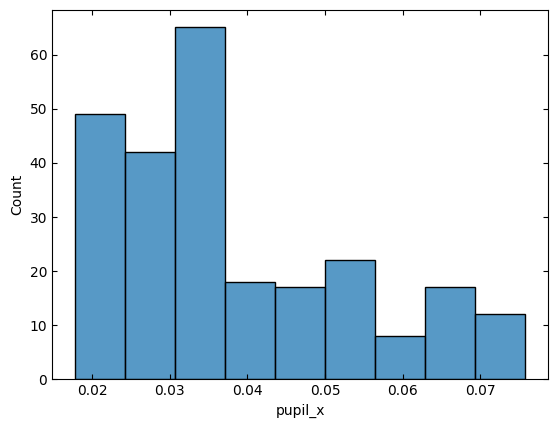

In [17]:
sns.histplot(data=df_50, x='pupil_x')

Make the same histogram but with `stat` set to `probability`. What has changed in the plot?

<Axes: xlabel='pupil_x', ylabel='Probability'>

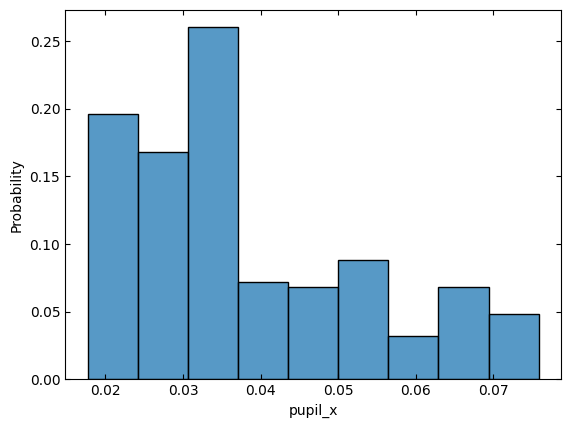

In [19]:
sns.histplot(data=df_50, x='pupil_x', stat='probability')

Create another histogram with a different option for `stat`. **Hint** - you can find the options by running `sns.histplot?`

<Axes: xlabel='pupil_x', ylabel='Percent'>

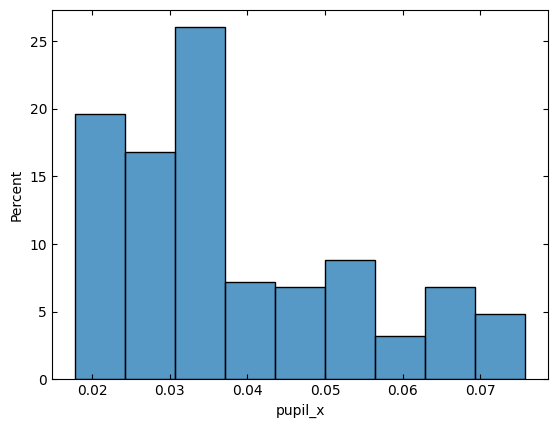

In [21]:
sns.histplot(data=df_50, x='pupil_x', stat='percent')

Now plot the distributions of pupil x positions for trials 17 and 50. Do you think they look similar?

<Axes: xlabel='pupil_x', ylabel='Count'>

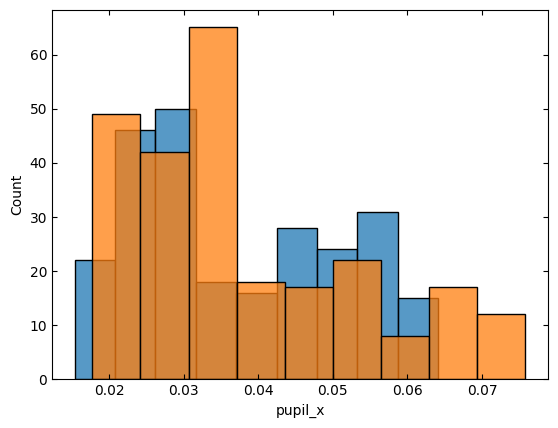

In [8]:
sns.histplot(data=df[df.trial==17], x='pupil_x', stat='count')
sns.histplot(data=df_50, x='pupil_x', stat='count')

We will now perform a t-test with `pingouin` to asses how similar the above distributions are

In [4]:
pg.ttest(df[df.trial==17]['pupil_x'], df[df.trial==50]['pupil_x'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.697903,498,two-sided,0.485564,"[-0.0, 0.0]",0.062422,0.126,0.107169


The T value is quite close to zero, telling us that the two distributions are quite similar. 

We also have a high `p-val`, which tells us the probability of our inputted data being taken from the same underlying distribution.

Let's check the result of the t-test when we compare the pupil x positions of trial 50 with itself

In [9]:
pg.ttest(df[df.trial==50]['pupil_x'], df[df.trial==50]['pupil_x'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.0,498,two-sided,1.0,"[-0.0, 0.0]",0.0,0.099,0.05


Here the T value is 0 exactly, and the `p-val` is 1.0 because the inputted data is definitely the same!

Assess how similar the pupil x positions are for trials 8 and 134. What do you find?

In [16]:
pg.ttest(df[df.trial==8]['pupil_x'], df[df.trial==134]['pupil_x'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,17.853231,498,two-sided,1.809677e-55,"[0.03, 0.04]",1.596842,6.726e+51,1.0


In [89]:
dataset = xr.load_dataset('/home/ben/ibots/workshop_data/steinmetz_mouse/convert_steinmetz_dataset/data/processed/neuropixels/steinmetz_2017-01-08_Muller.nc')

dataset.where(dataset.active_trials==1 , drop=True)[['trial', 'pupil_x', 'pupil_y', 'contrast_left', 'contrast_right','wheel','response_type']].to_dataframe().reset_index().to_csv('data/pupil.csv',index=False)


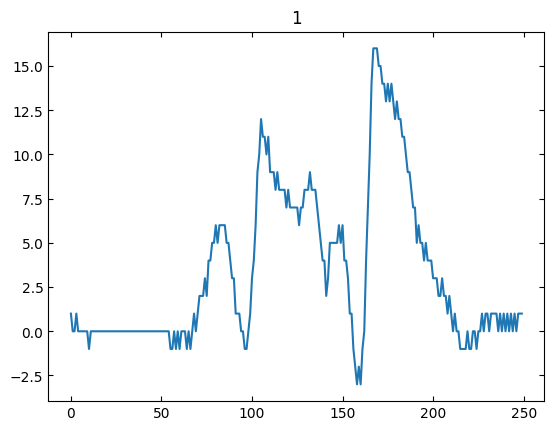

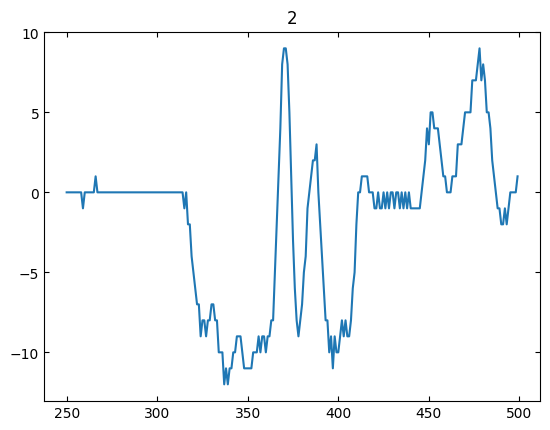

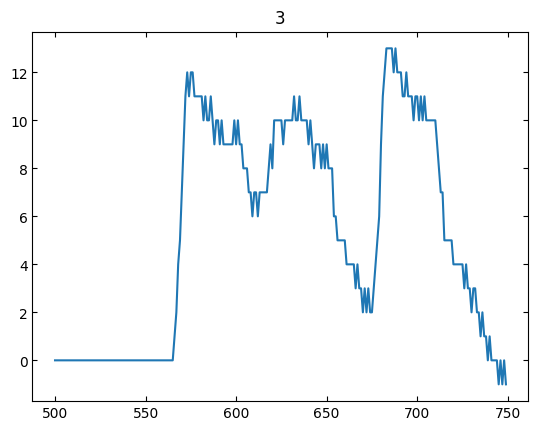

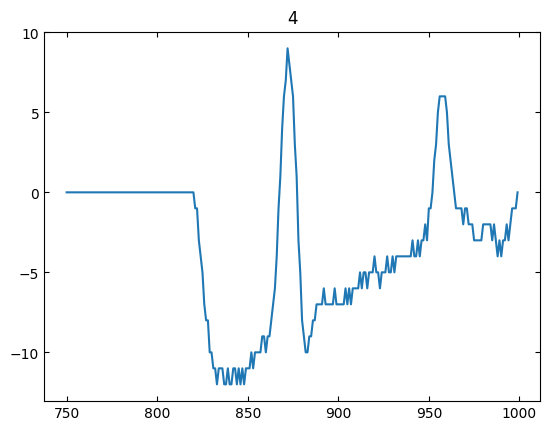

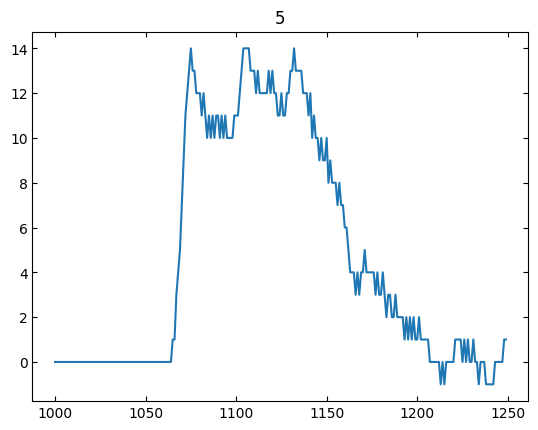

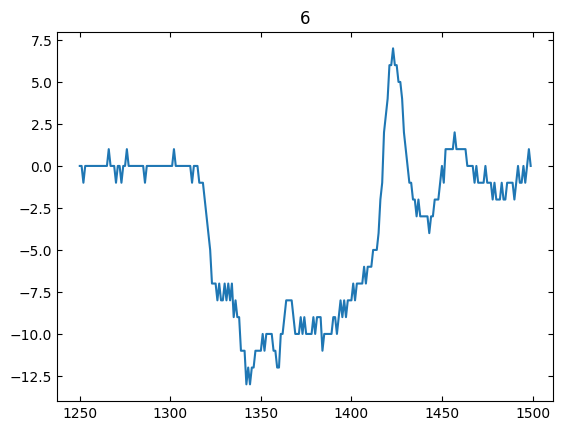

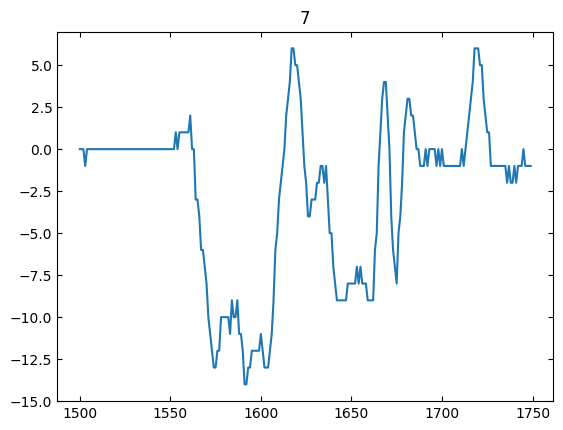

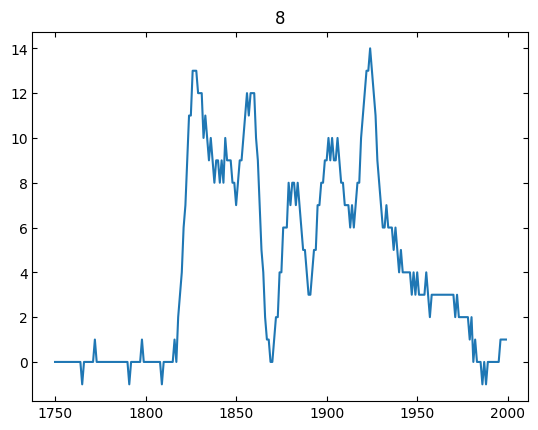

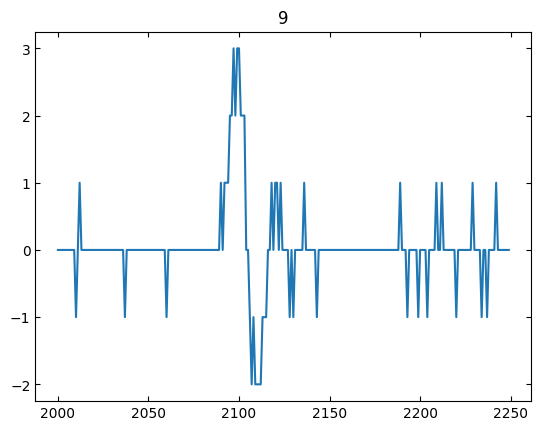

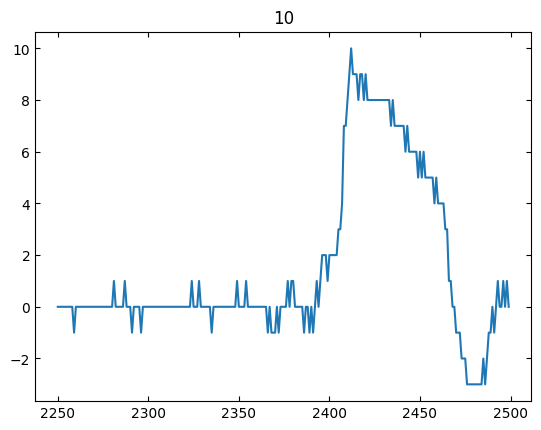

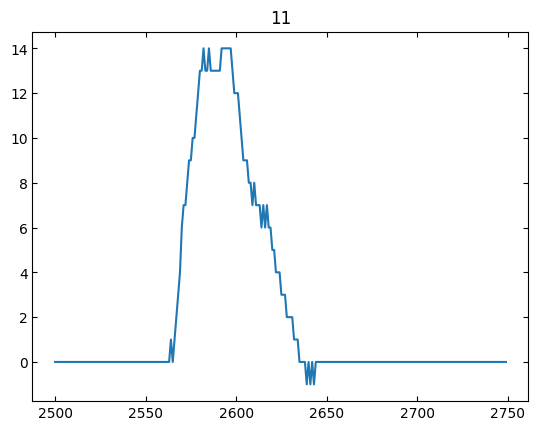

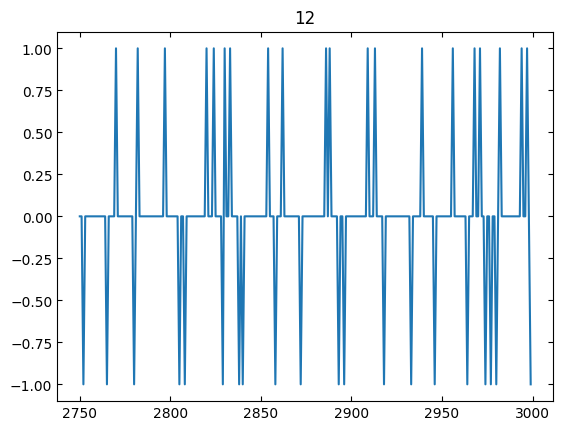

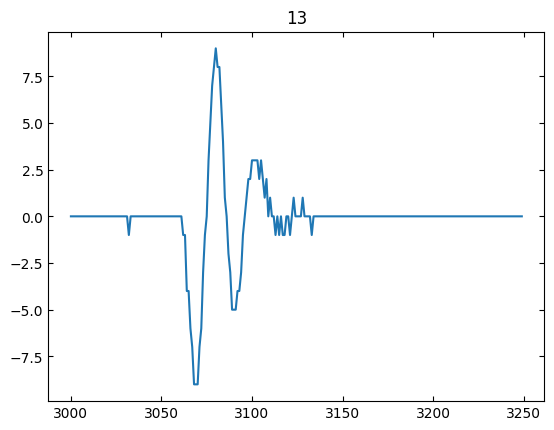

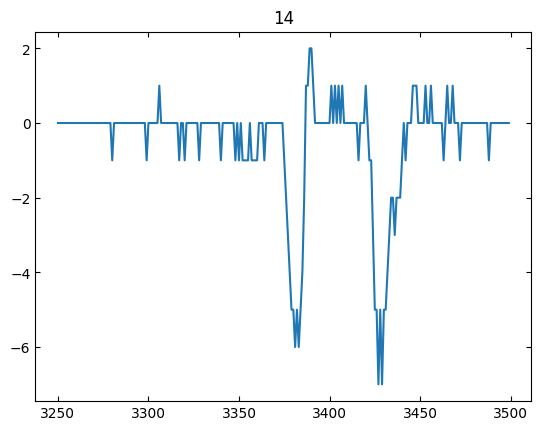

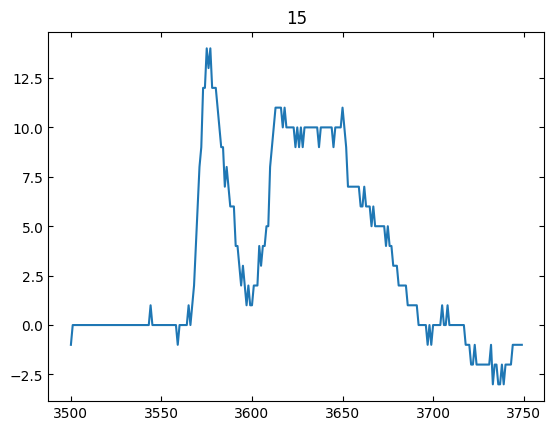

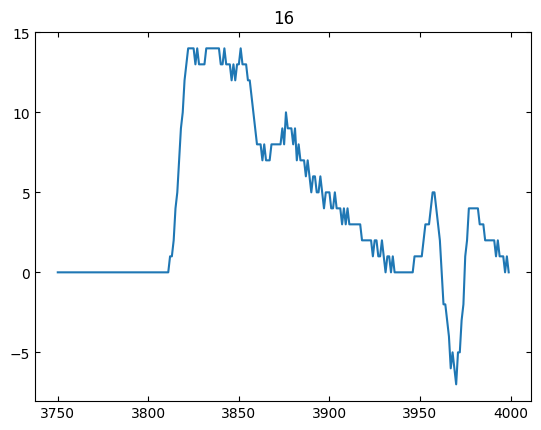

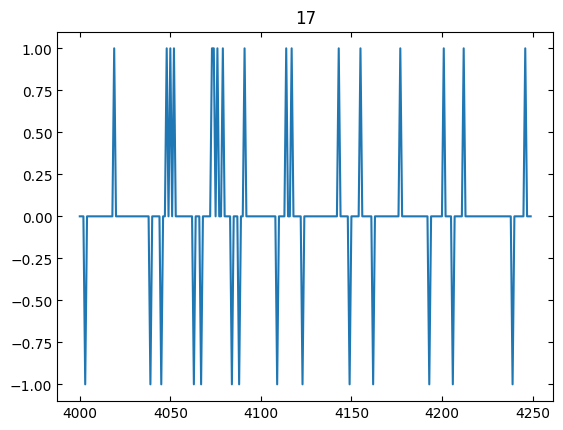

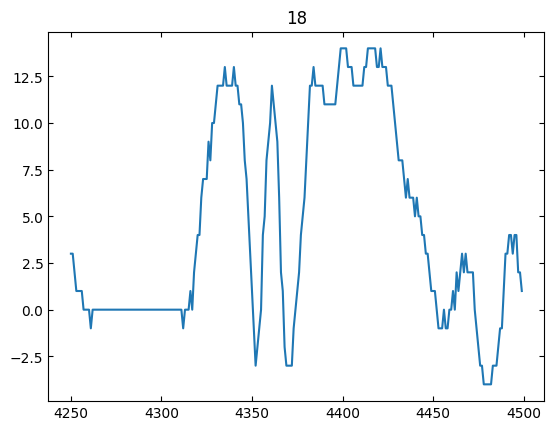

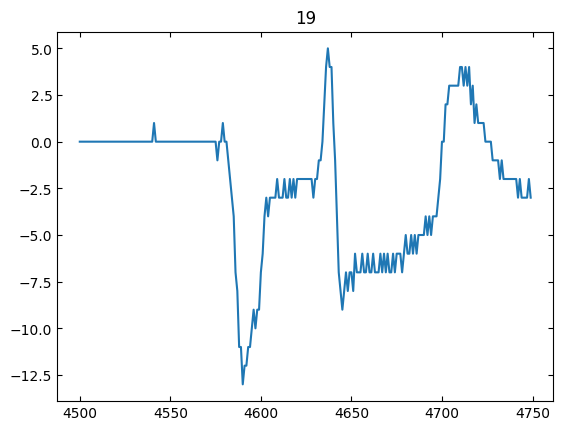

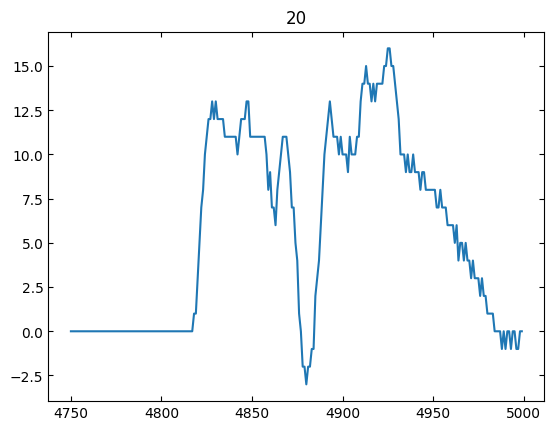

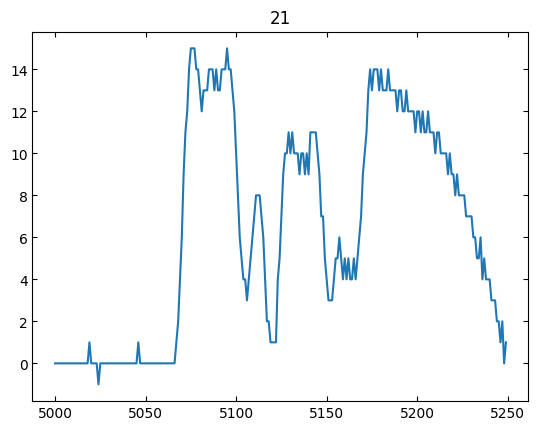

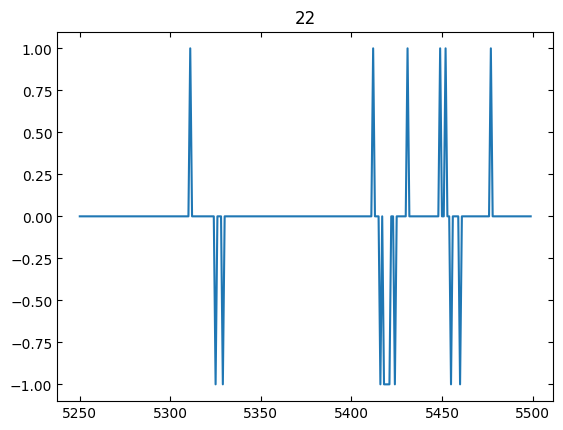

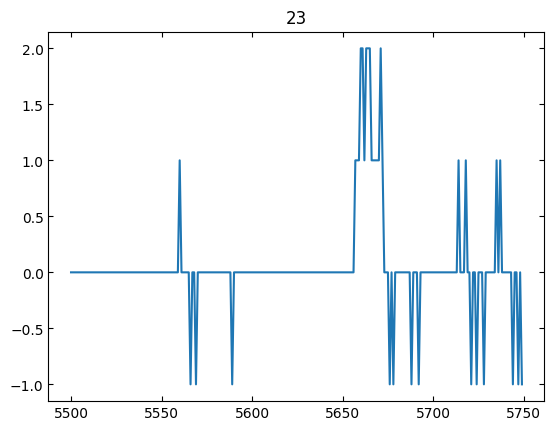

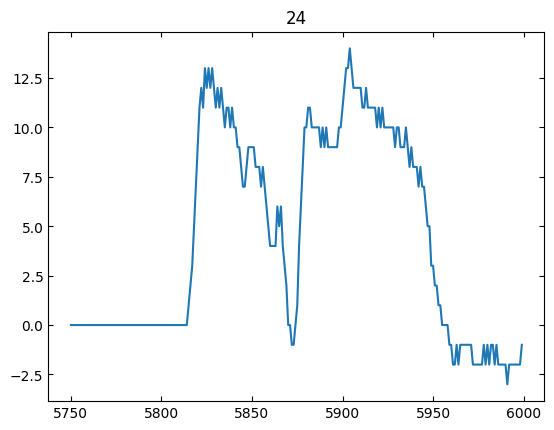

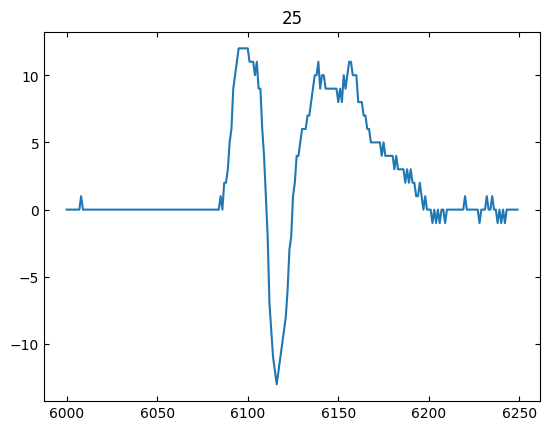

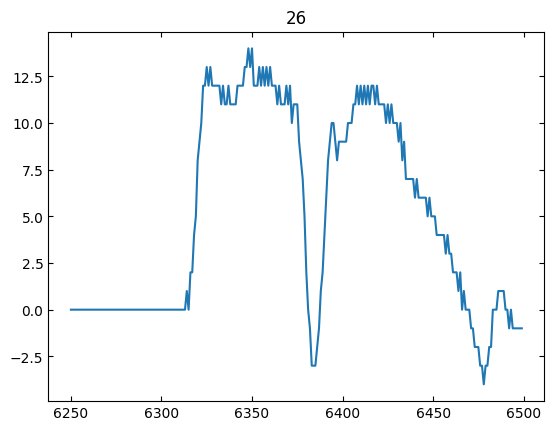

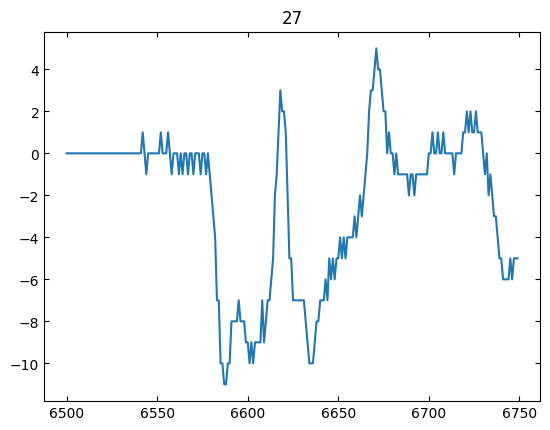

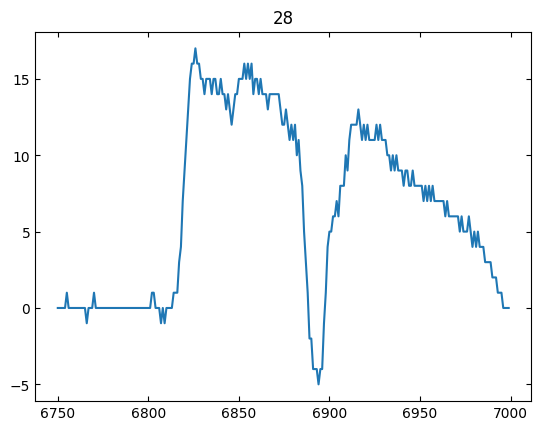

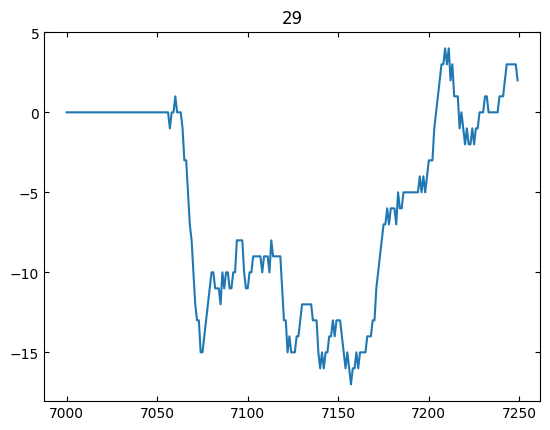

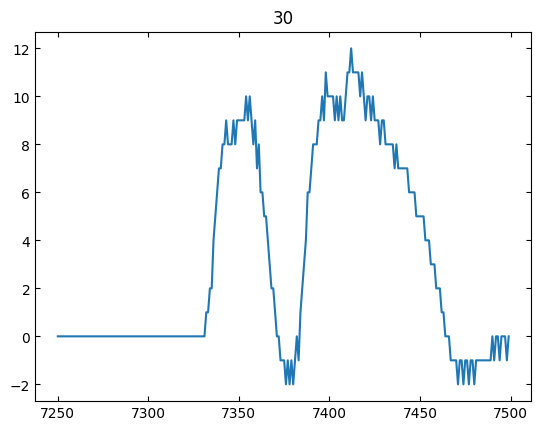

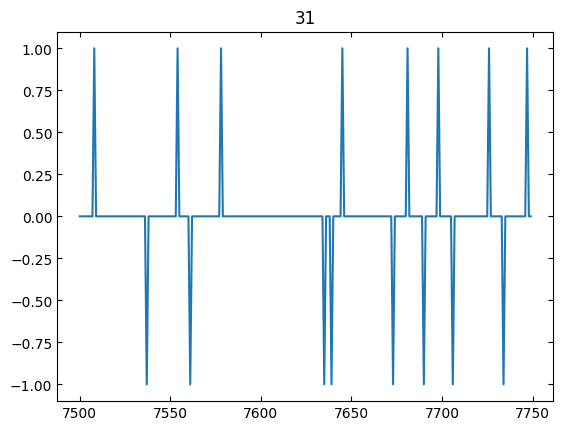

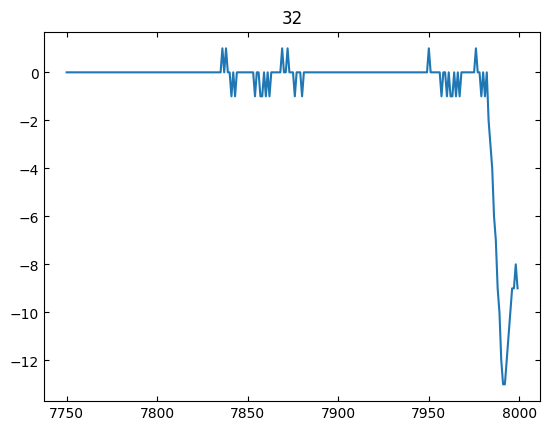

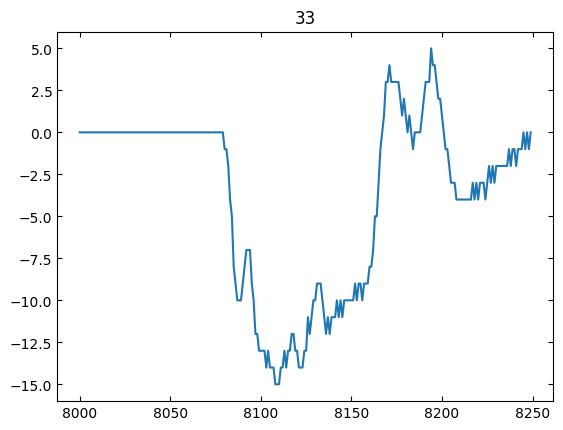

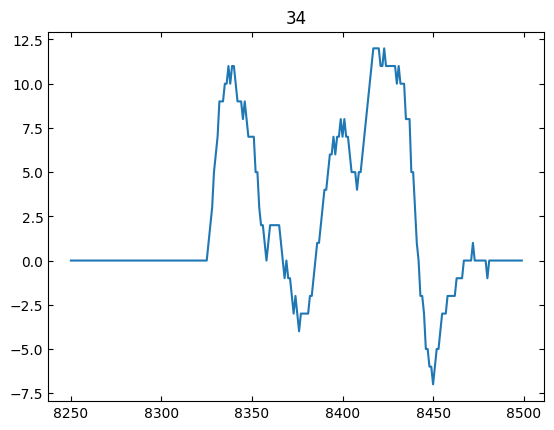

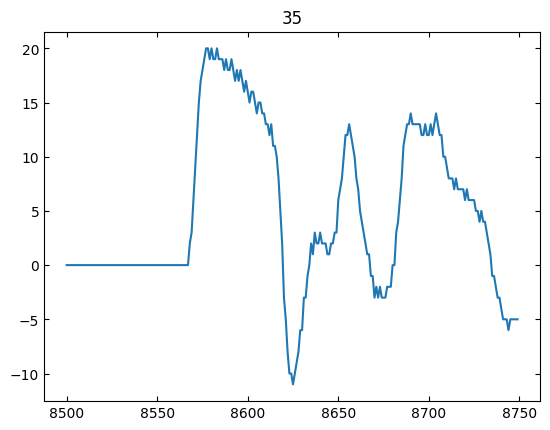

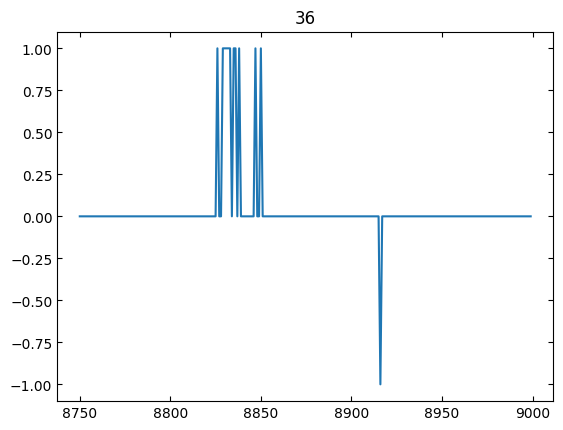

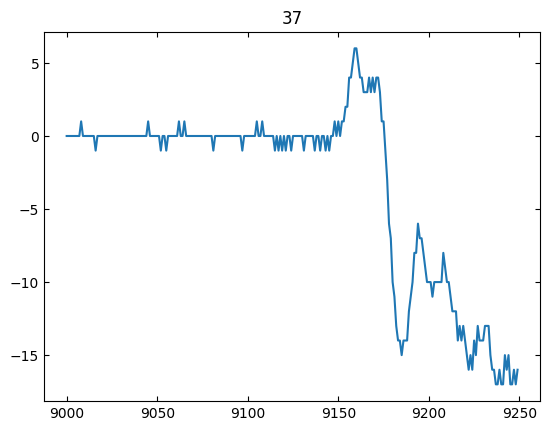

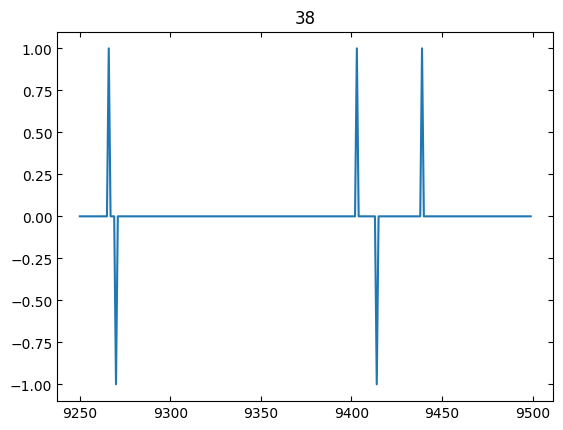

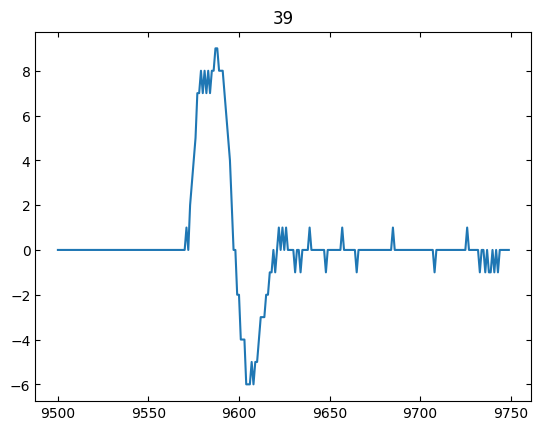

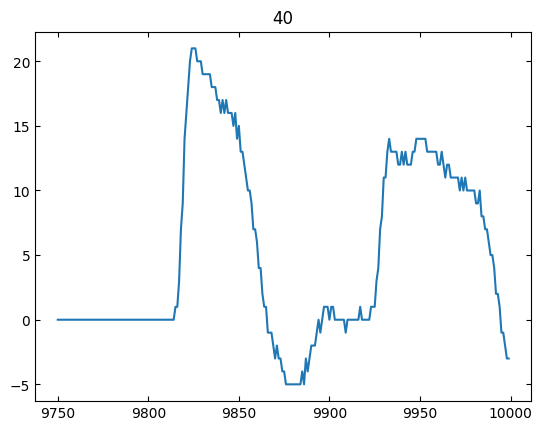

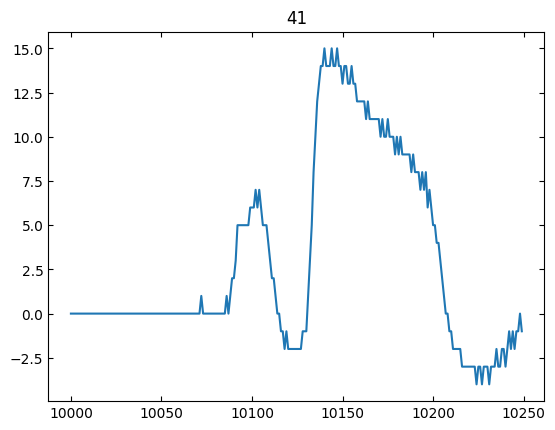

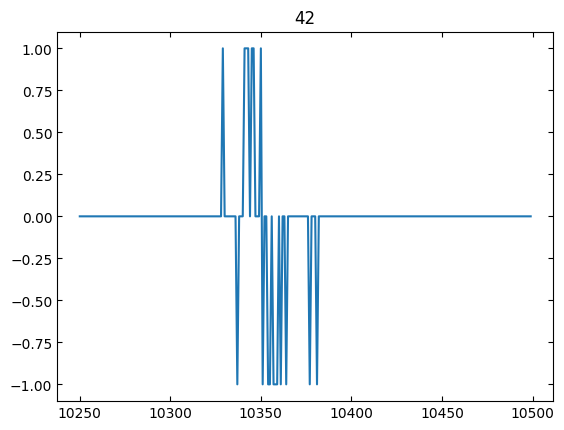

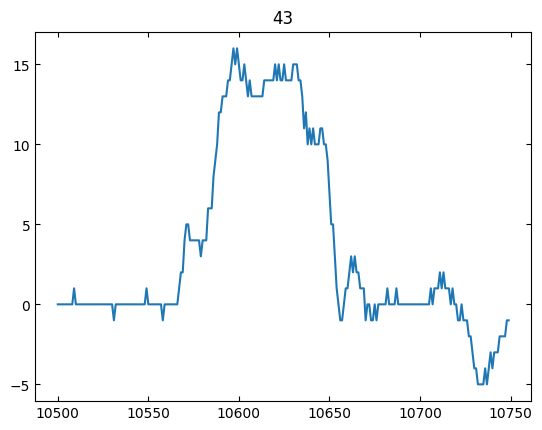

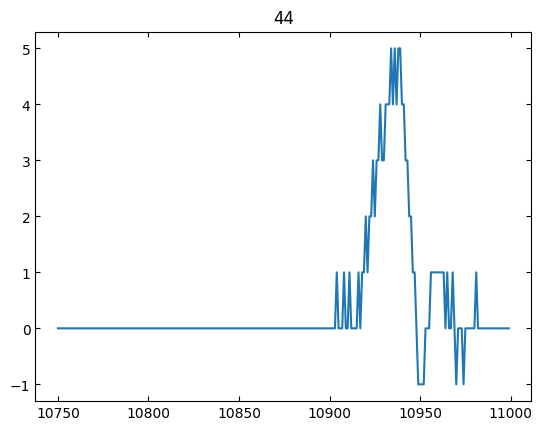

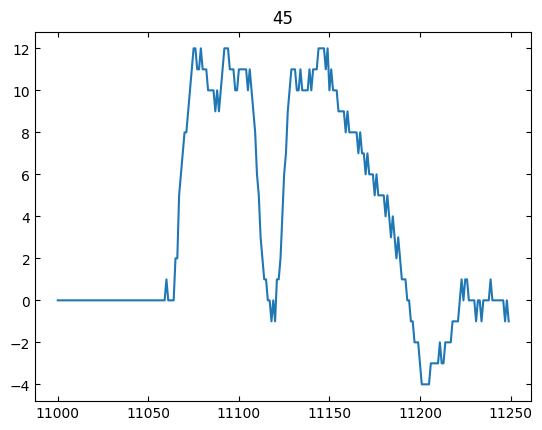

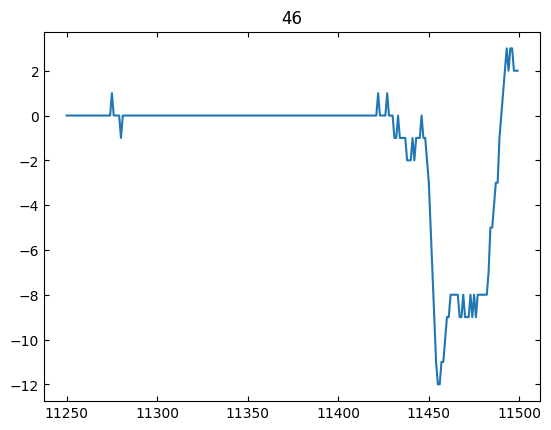

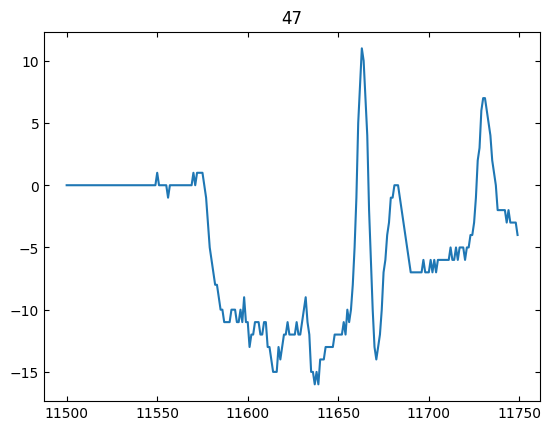

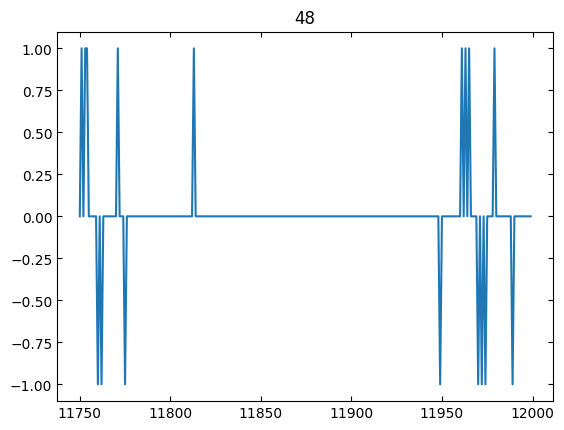

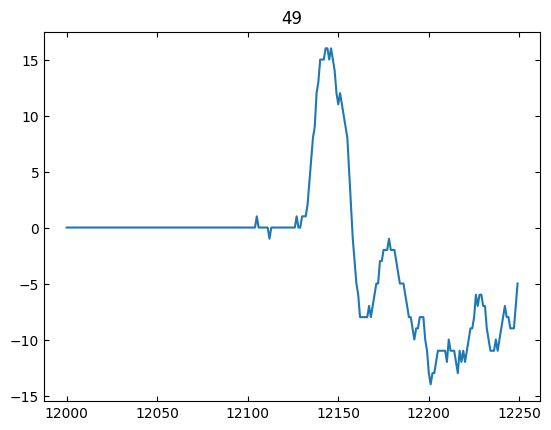

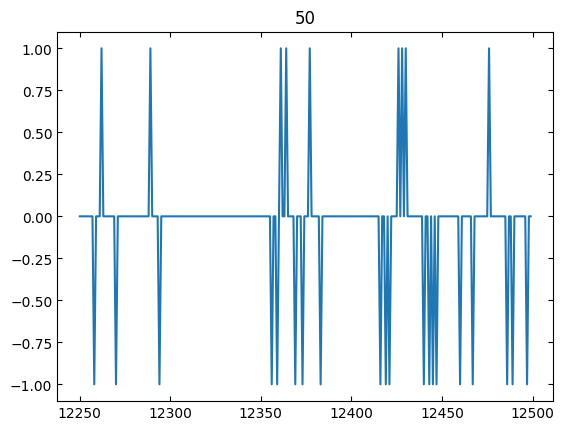

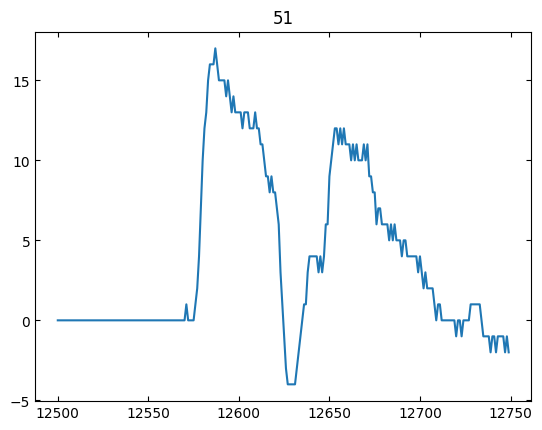

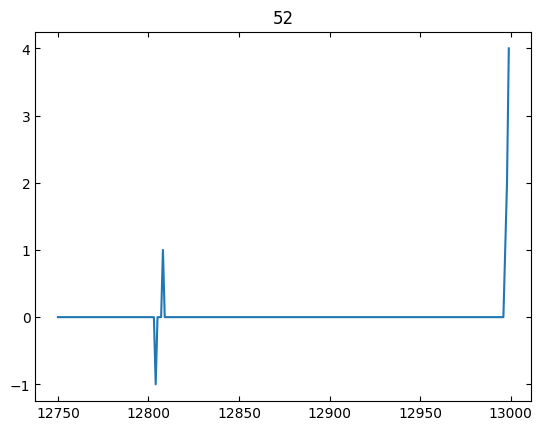

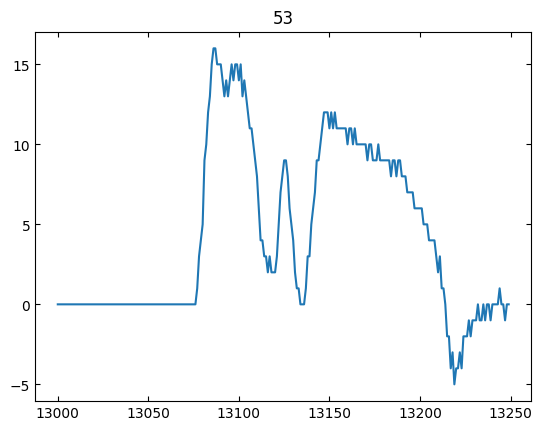

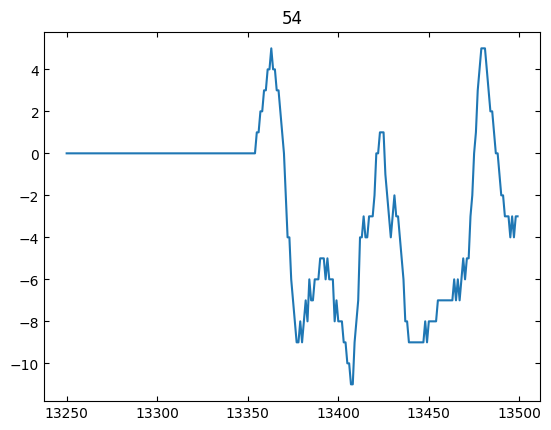

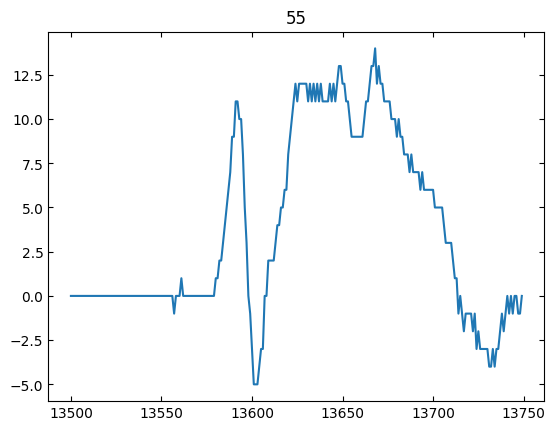

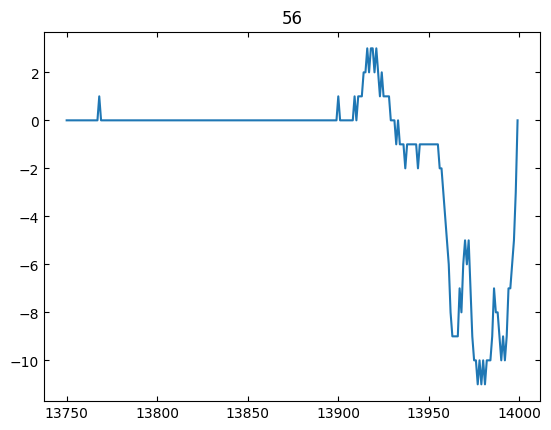

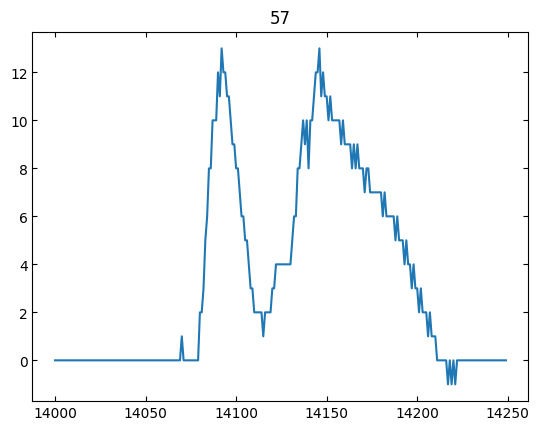

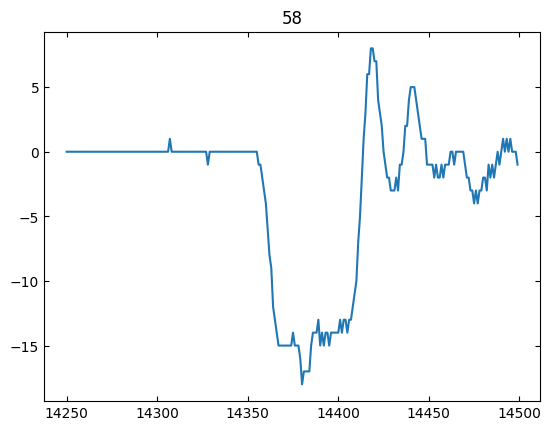

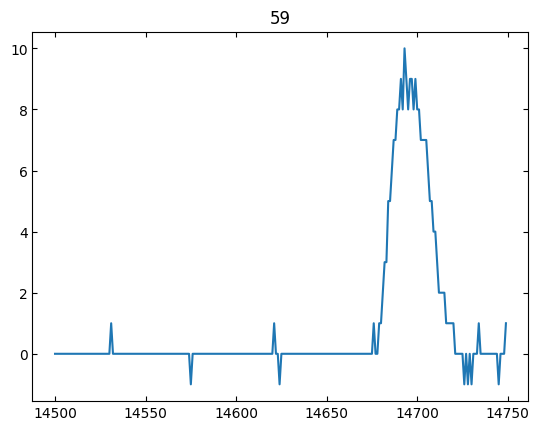

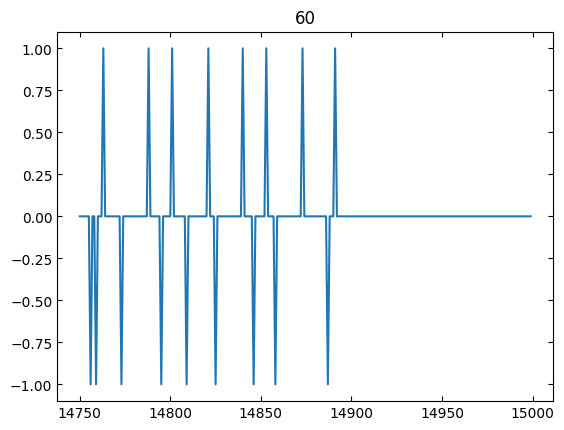

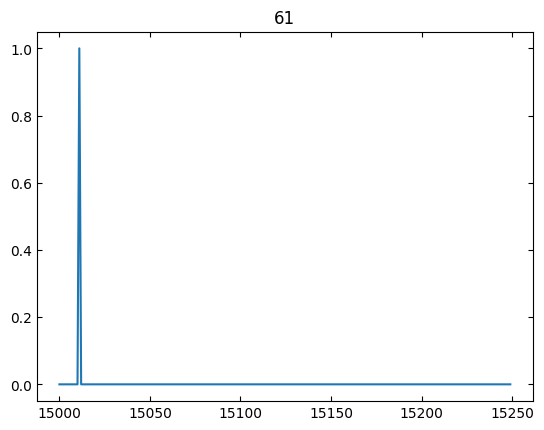

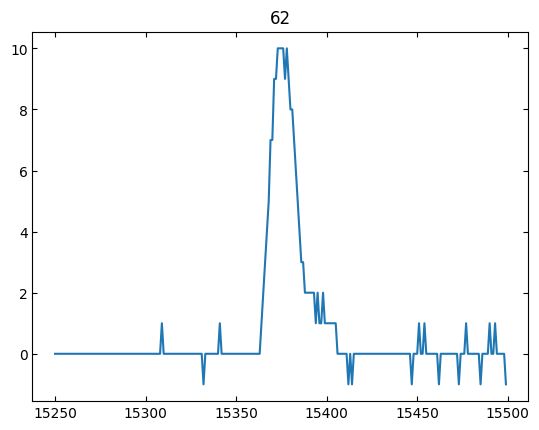

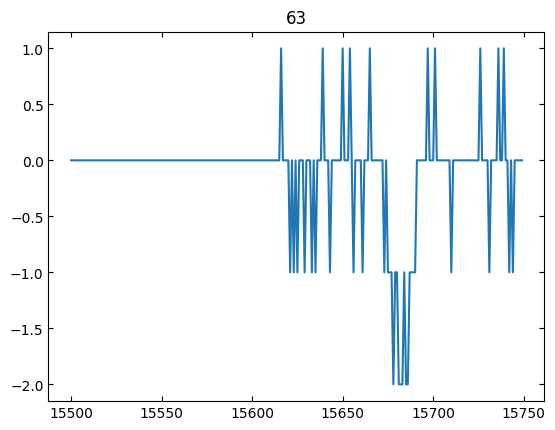

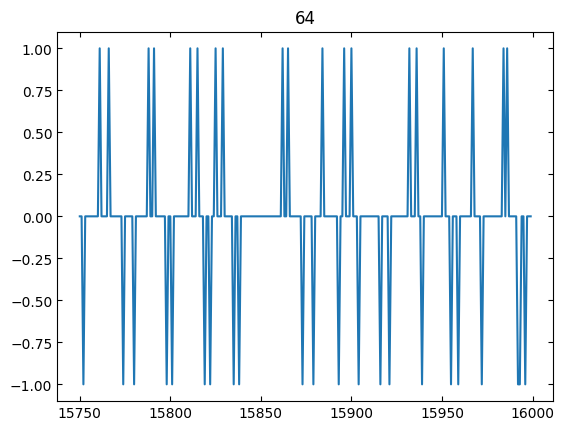

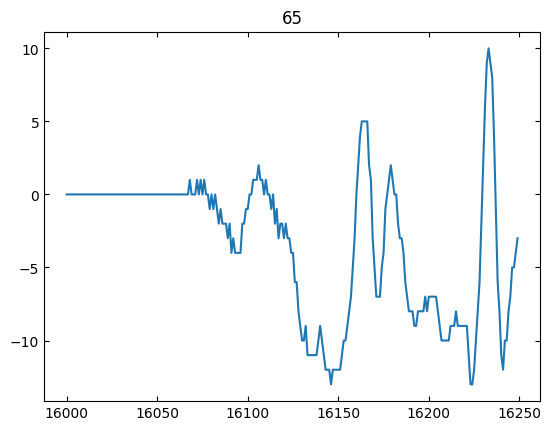

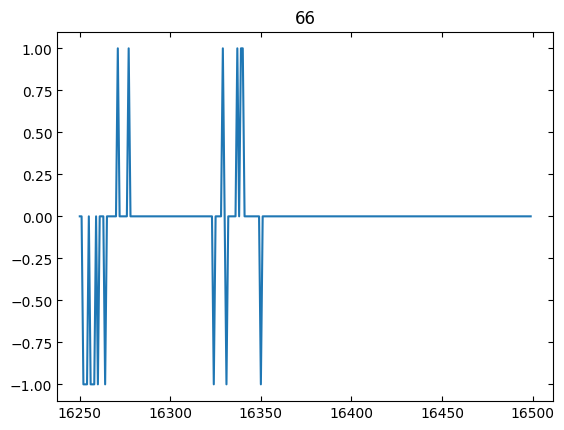

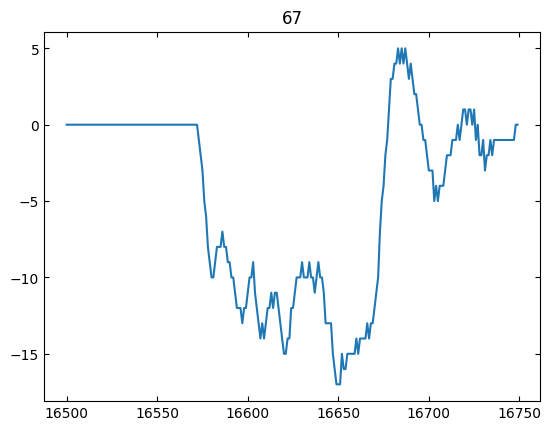

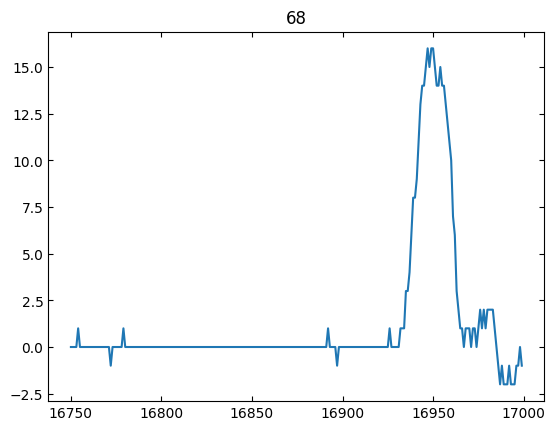

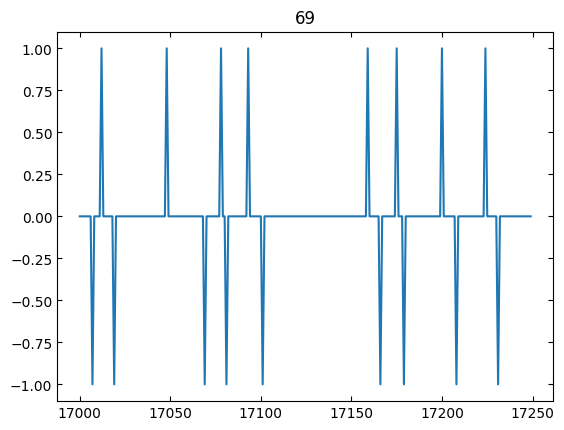

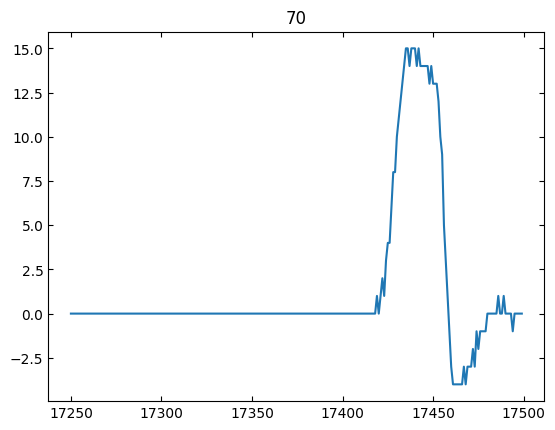

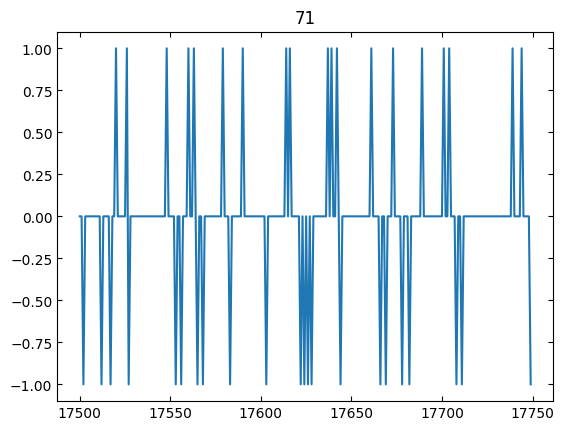

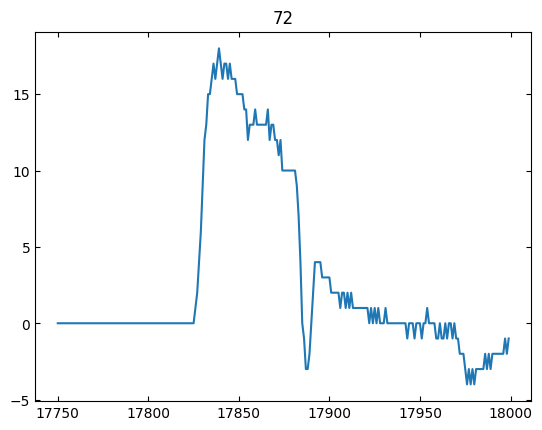

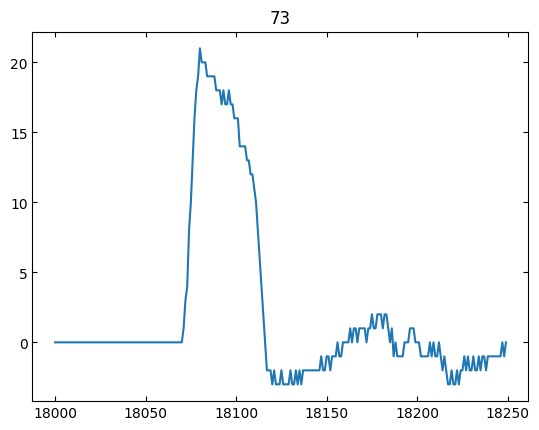

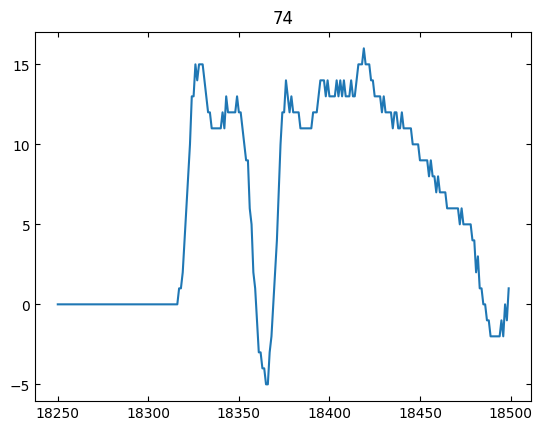

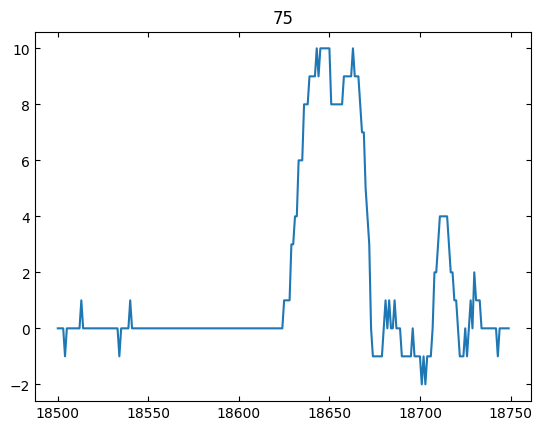

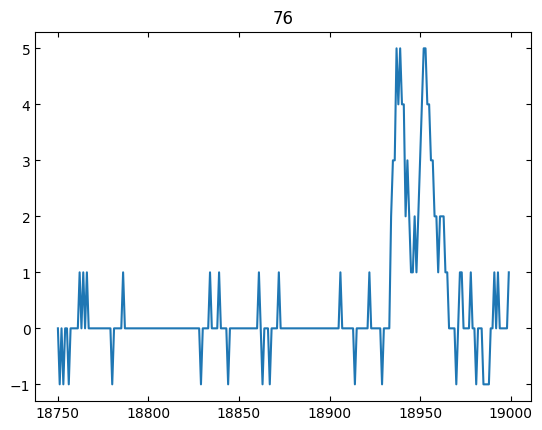

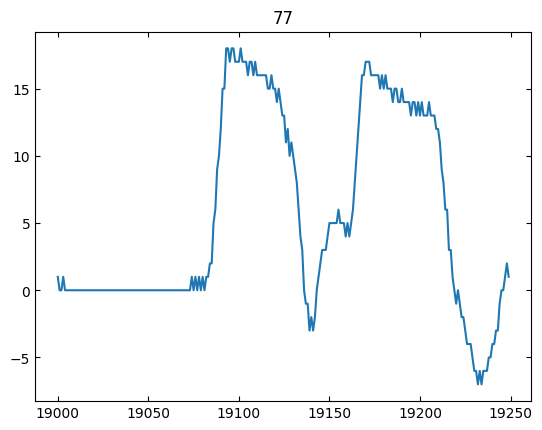

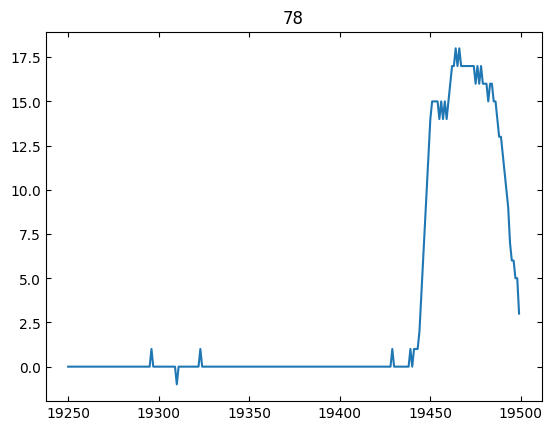

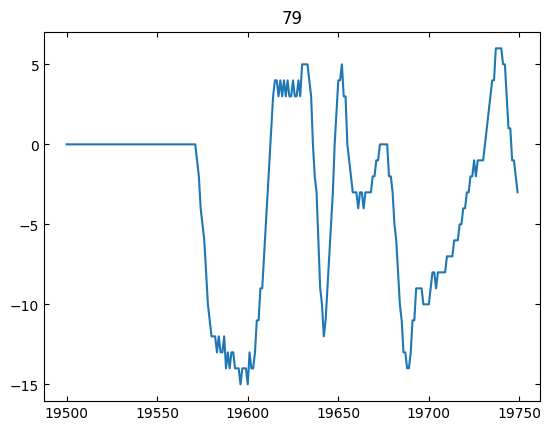

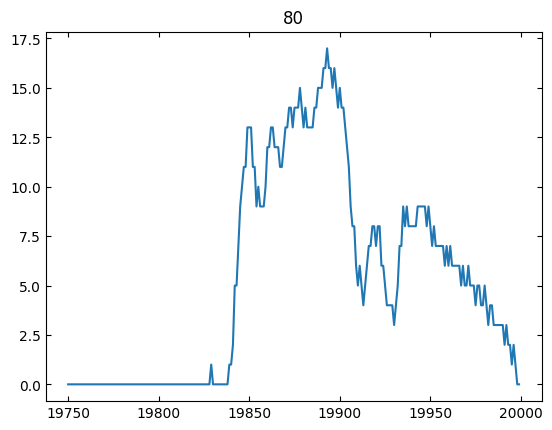

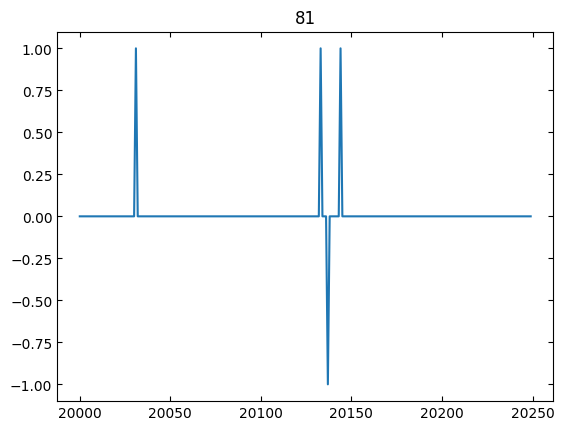

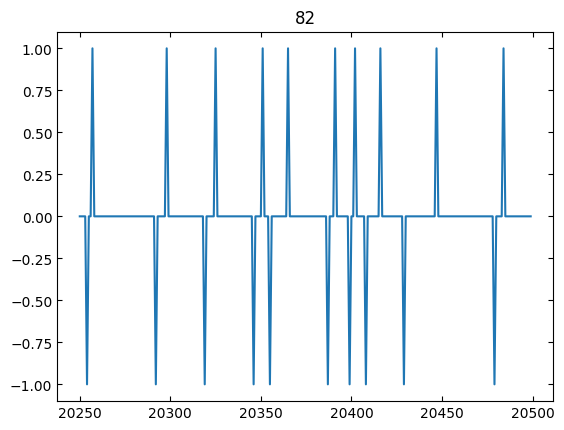

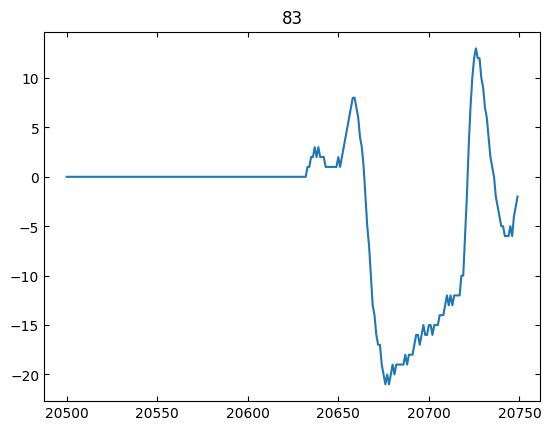

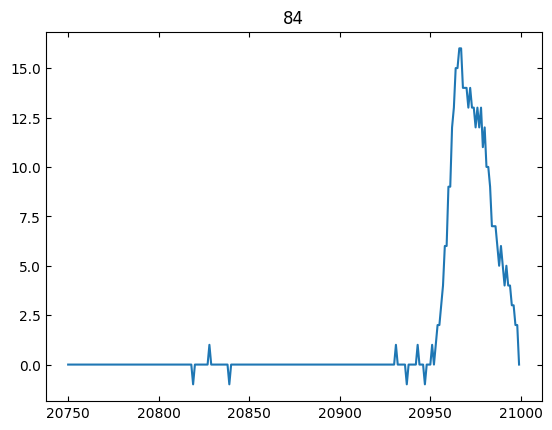

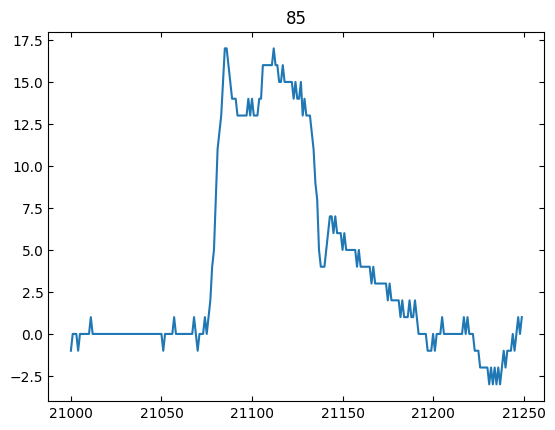

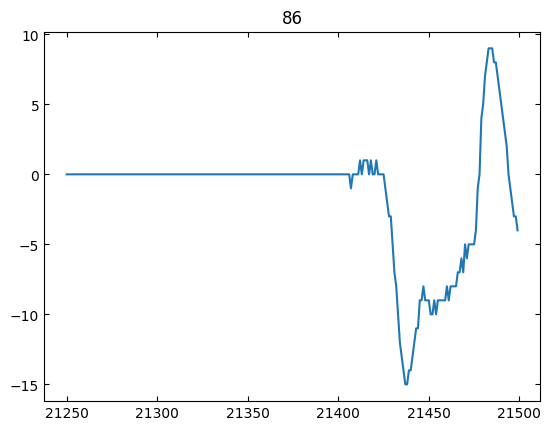

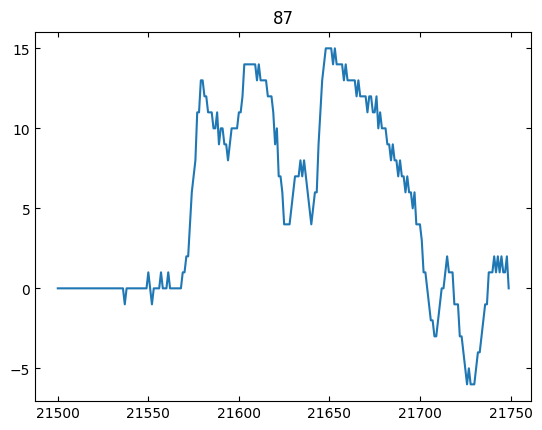

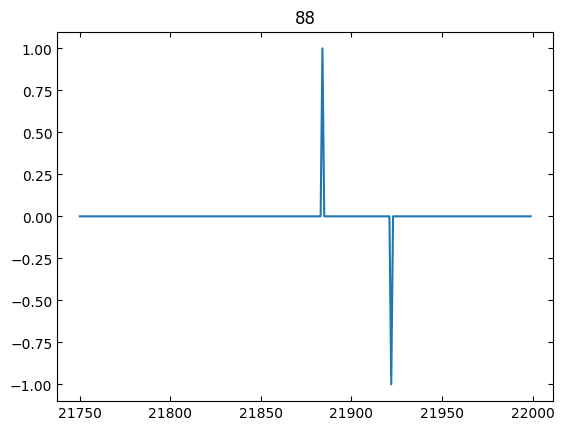

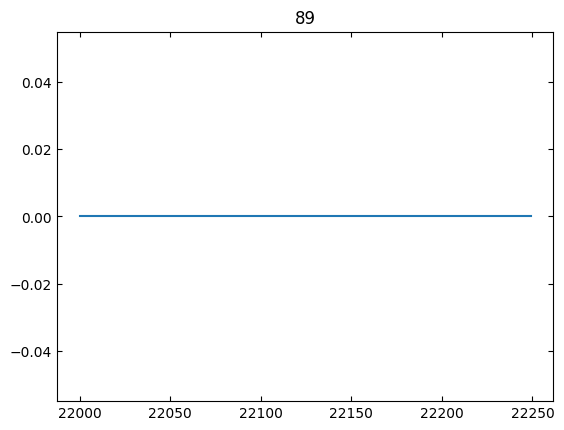

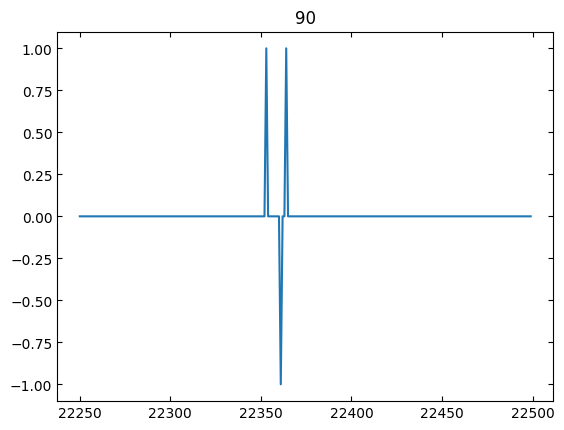

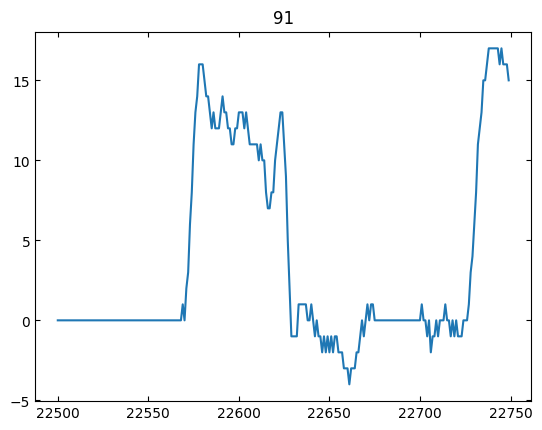

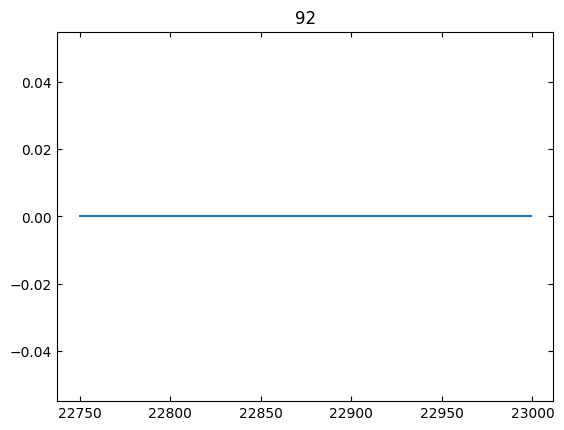

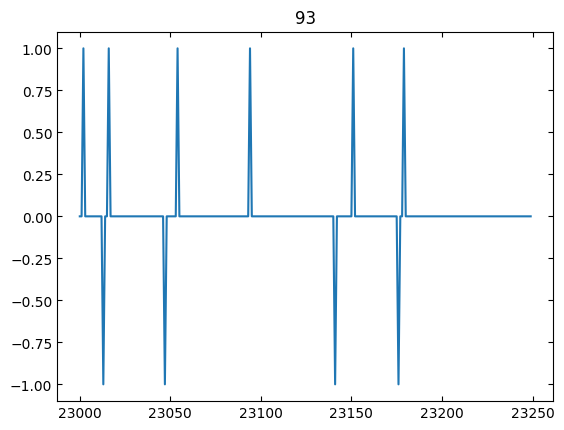

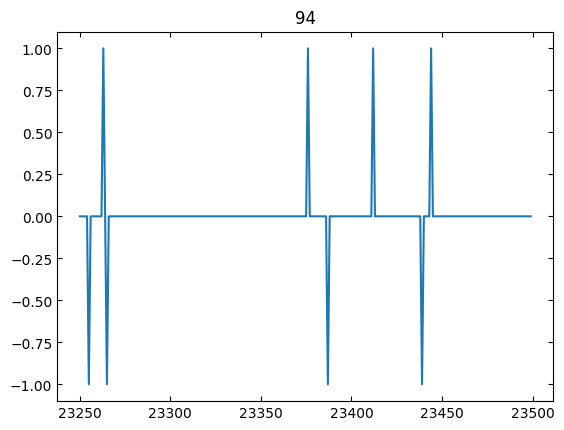

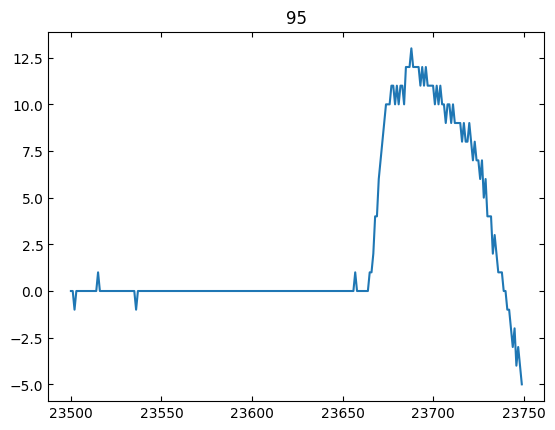

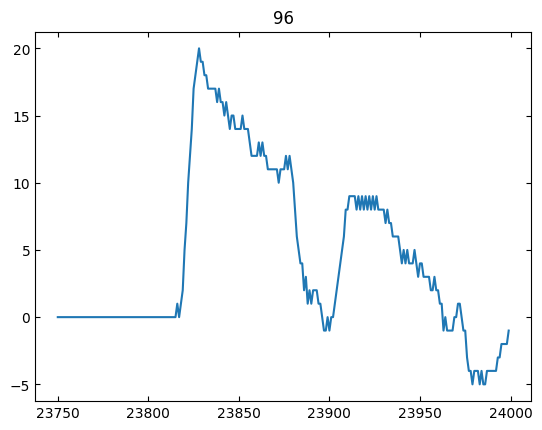

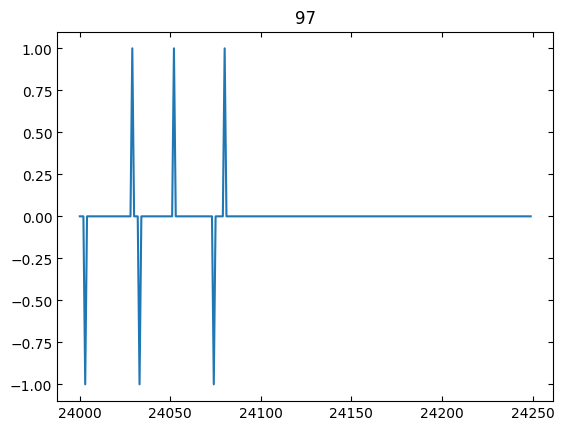

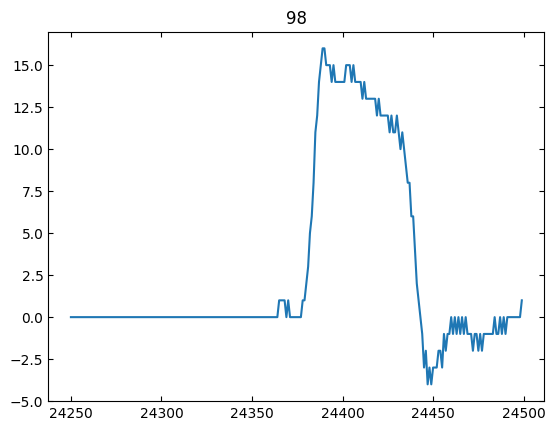

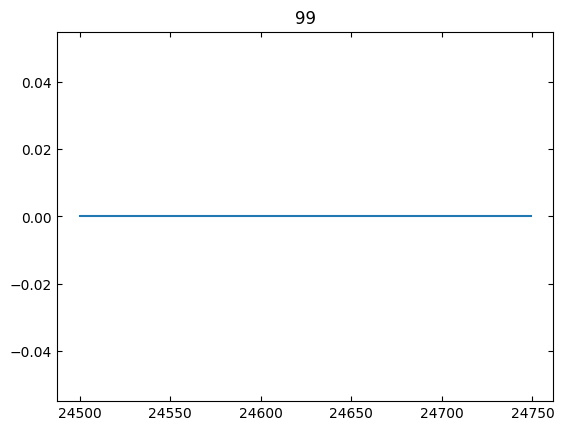

In [34]:
import matplotlib.pyplot as plt
for i in range(1,100):
    plt.plot(df[df.trial==i]['wheel'])
    plt.title(i)
    plt.show()